In [ ]:
import pandas as pd
import numpy as np
import glob
import os

from PIL import Image

## csv 형태로 class id, name 저장
- 혹시나 쓸일 있을까 싶어서 만들어 봤습니다.

In [ ]:
# path = '/content/drive/MyDrive/안봐도보이조_project/train_CAN/*'
# df = pd.DataFrame([])
# id = []
# name = []
# for i in glob.glob(path):
#   id.append(i.split('train_CAN/')[1].split('_')[0])
#   name.append(i.split('train_CAN/')[1].split('_')[1])

# df['item_id'] = id
# df['name'] = name

In [ ]:
# df.to_csv('/content/drive/MyDrive/안봐도보이조_project/김강산/id.csv', index=False)

## 기존 데이터 정리
- resize한 데이터를 다른 사이즈로 변경하기전 데이터를 제가하는 코드입니다.

In [ ]:
# path = '/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/*'
# for f in glob.glob(path):
#   os.remove(f)
# path = '/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/valid/*'
# for f in glob.glob(path):
#   os.remove(f)

## multi image 제거

In [ ]:
# path = '/content/drive/MyDrive/안봐도보이조_project/김강산/origin_data/train/*/*m*.*'
# for f in glob.glob(path):
#   os.remove(f)

# path = '/content/drive/MyDrive/안봐도보이조_project/김강산/origin_data/valid/*/*m*.*'
# for f in glob.glob(path):
#   print('{}:제거'.format(f))
#   os.remove(f)

## 전체 이미지 resize
- save_path, target_size 파라미터 추가함
- train, valid 나누어서 작업함

In [ ]:
origin_path = '/content/drive/MyDrive/안봐도보이조_project/김강산/origin_data/train/*'
train_total = []
for i in glob.glob(origin_path):
  train_total.append(i)

In [ ]:
origin_path = '/content/drive/MyDrive/안봐도보이조_project/김강산/origin_data/valid/*'
valid_total = []
for i in glob.glob(origin_path):
  valid_total.append(i)

In [ ]:
def resize_images(img_path, id, save_path, target_size):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    count=1
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(save_path+'/{}_{}.jpeg'.format(id, str(count)))
        count+=1
    print(len(images), " images resized.")

In [ ]:
for f_path in train_total:
  print(f_path.split('/train/')[1].split('_')[0])
  print(f_path.split('/train/')[1].split('_')[1])

10013
해태갈배사이다355ML
10018
롯데레쓰비175ML
10015
롯데핫식스자몽250ML
10019
코카콜라)킨사이다185ML


In [ ]:
# train set resize
# 다시 실행시 save_path, target_size 넣을 것

class_dict = dict([])

target_size = (512,512)
save_path = '/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train'

for f_path in train_total:
  id = f_path.split('/train/')[1].split('_')[0]
  class_dict[id] = f_path.split('/train/')[1].split('_')[1]
  resize_images(f_path, id, save_path, target_size)

save_path = '/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/valid'

for f_path in valid_total:
  id = f_path.split('/valid/')[1].split('_')[0]
  resize_images(f_path, id, save_path, target_size)

## 이미지 로드

In [ ]:
def load_data(img_path, number_of_data, torv,img_size, color):  

    #이미지 데이터와 라벨(제품번호) 데이터를 담을 matrix 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0

    for f in glob.glob(img_path + "/*.jpeg"):
      print(f)
      img = np.array(Image.open(f),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]= f.split(torv)[1].split('_')[0]  # 상품번호, 자신의 이미지 패스에 맞추어서 조정할 것 
      idx=idx+1

    print("변환데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
img_path = '/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train'
number_of_data = len(glob.glob('/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/*'))
torv = '/train/'
train_x, labels = load_data(img_path, number_of_data, torv, 512, 3)

img_path = '/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/valid'
number_of_data = len(glob.glob('/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/valid/*'))
torv = '/valid/'
valid_x, valid_labels = load_data(img_path, number_of_data, torv, 512, 3)

/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_1.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_2.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_3.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_4.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_5.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_6.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_7.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_8.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_9.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_10.jpeg
/content/drive/MyDrive/안봐도보이조_project/김강산/resize_dataset/train/10013_11.jpeg
/content/drive/MyDr

- 정상적으로 로드된 것을 확인

10013


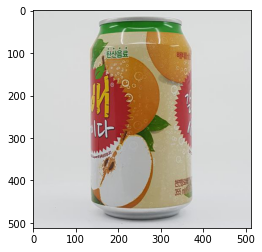

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])
print(labels[0])

In [ ]:
for i in labels:
  print(i)

## 라벨인코딩
- 역변환 코드 추가

In [ ]:
# 학습 라벨
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
train_y = encoder.transform(labels)

In [ ]:
# 평가 라벨
encoder = LabelEncoder()
encoder.fit(valid_labels)
valid_y = encoder.transform(valid_labels)

In [ ]:
# 역변환
# encoder.inverse_transform(train_y)

## 학습전 데이터 정규화 및 체크

In [ ]:
train_x_norm = train_x.reshape(-1,512,512,3)/255

In [ ]:
valid_x_norm = valid_x.reshape(-1,512,512,3)/255

In [ ]:
train_x_norm.shape, train_y.dtype

((232, 512, 512, 3), dtype('int64'))

In [ ]:
train_y, labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([10013, 10013, 10013, 10013, 10013, 10013, 10013, 10013, 10013,
        10013, 10013, 10013, 10013, 10013, 10013, 10013, 10013, 10013,
        10013, 10013, 10013, 10013, 10013, 10013, 10013, 10013, 10013,
 

## 모델 생성
- 모뎅 생성, 학습, 평가 부분입니다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 모델 설정
# 여러가지 다양한 모델링 고민해보기
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape = (512,512,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu')) 
model.add(keras.layers.Dense(4, activation = 'softmax')) # 4가지 종류의 음료로 분류

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 64)       0

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_x_norm, train_y, batch_size=32, epochs=3)

Epoch 1/3
8/8 [==============================] - 69s 8s/step - loss: 14.3458 - accuracy: 0.4009
Epoch 2/3
8/8 [==============================] - 64s 8s/step - loss: 0.3542 - accuracy: 0.8707
Epoch 3/3
8/8 [==============================] - 64s 8s/step - loss: 0.0486 - accuracy: 0.9871


## 모델 평가
- 생각보다 상당히 잘 됨
- 클래스 수가 적고 valid 데이터도 적어서 높은 정확도가 나옴
- subplot을 20개 이상그리면 워닝 메세지가 발생해서 20개까지만 봄

In [ ]:
model.evaluate(valid_x_norm, valid_y)

1/1 [==============================] - 3s 3s/step - loss: 0.0037 - accuracy: 1.0000


[0.003656879300251603, 1.0]

In [ ]:
pred = model.predict(valid_x_norm)
len(pred)

28

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4538 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4370 missing from current font.
  font.set_text(s

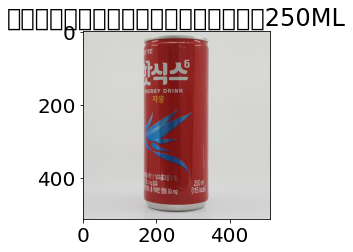

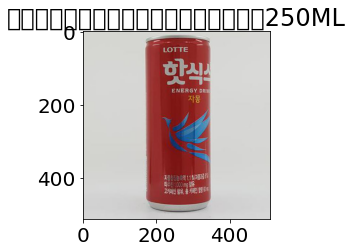

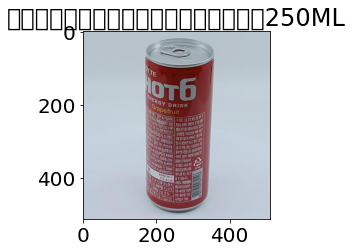

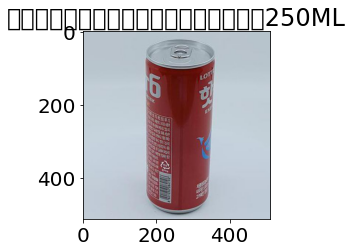

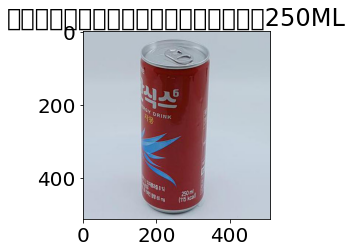

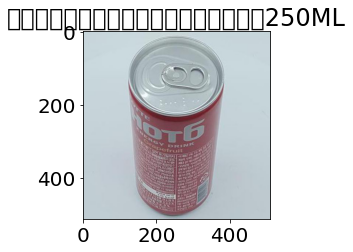

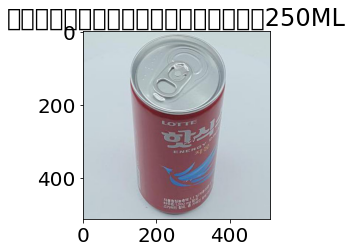

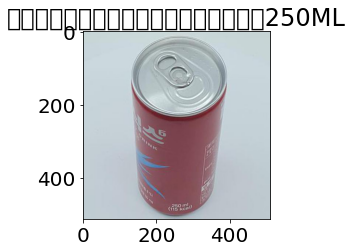

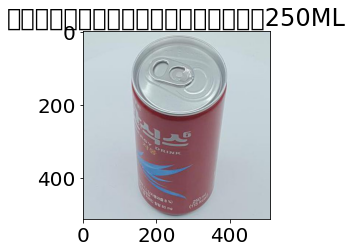

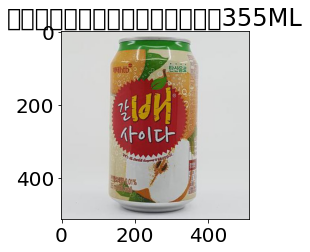

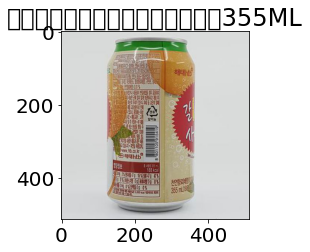

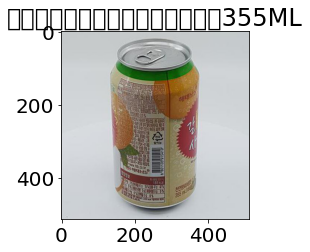

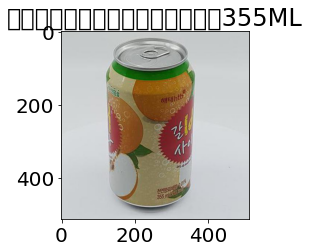

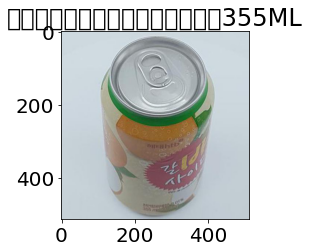

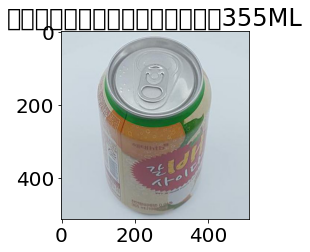

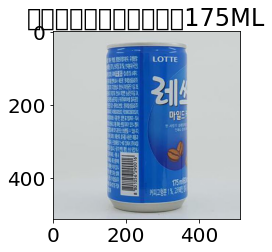

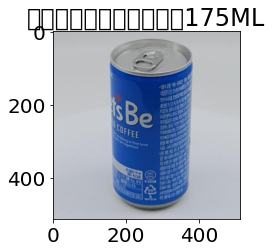

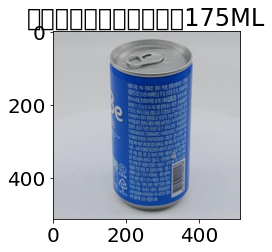

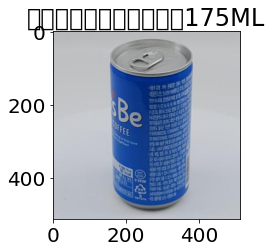

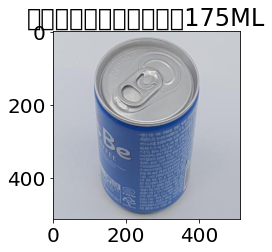

In [ ]:
num = 1
for idx ,p in enumerate(pred[:20]):
  id = encoder.inverse_transform([p.argmax()])[0]
  id = str(id)
  plt.figure(figsize=(20, 20))
  plt.subplot(5,4, num).set_title(class_dict[id])
  plt.imshow(valid_x[idx])
  num += 1

In [ ]:
class_dict['10015']

'롯데핫식스자몽250ML'

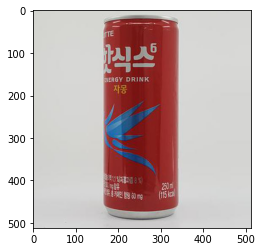

In [ ]:
plt.imshow(valid_x[0])